<a href="https://colab.research.google.com/github/43pratik/WeIntern-internship/blob/main/Week-2_Text-Classification/code/WeIntern_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Here imported all the neccessary library needed for Text classification like
# numpy, pandas, ML libraries, NLP Libraries, Visualization

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Here we load the dataset, keep the useful column and rename it
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

print(data.head())
print(data.shape)
print(data['label'].value_counts())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)
label
ham     4825
spam     747
Name: count, dtype: int64


In [9]:
#Here preprocessing is did

stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # It Convert to lowercase
    text = text.lower()

    #It Tokenize text
    tokens = word_tokenize(text)

    # It Remove stopwords and non-alphabetic words
    filtered_tokens = []
    for word in tokens:
        if word.isalpha() and word not in stop_words:
            filtered_tokens.append(word)

    #It Join tokens back to string
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text
data['cleaned_message'] = data['message'].apply(preprocess_text)
print(data[['message', 'cleaned_message']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts may...  
3                u dun say early hor u c already say  
4             nah think goes usf lives around though  


In [10]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['cleaned_message'])
y = data['label'].map({'ham': 0, 'spam': 1})
print("TF-IDF feature matrix shape:", X.shape)
print("Labels shape:", y.shape)

TF-IDF feature matrix shape: (5572, 3000)
Labels shape: (5572,)


In [11]:
#Here split the data in 80,20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 4457
Testing samples: 1115


In [12]:
#Here we train the model using Logistic regression with maximum of 1000 iteration
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
#Here we evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.94      0.67      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



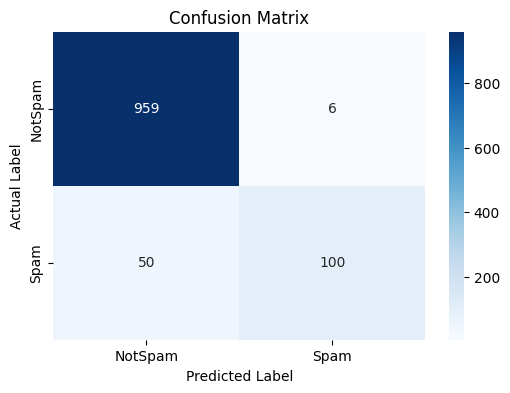

In [14]:
#here we create the confusion matrix and visualize it
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['NotSpam', 'Spam'],
    yticklabels=['NotSpam', 'Spam']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()